# Workshop 4: Image Segmentation

Image segmentation is the process of partitioning a image or video into regions, typically for the purpose of identifying specific objects or features. For example, identifying different tissue types in medical images, or distinguishing objects in astronomical images.
<img src="https://d3i71xaburhd42.cloudfront.net/1b699b098ec7a5e539afd8370d71a82d41e3370d/3-Figure1-1.png" width="400px" />

In this workshop, you will use image segmentation techniques to reproduce part of a famous experiment - Jean Perrin’s confirmation of Einstein’s Brownian motion equation.

In this experiment, tiny particles suspended in water are observed through a microscope. Due to collisions with water molecules, the particles appear to move in a random and erratic fashion known as [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion). In 1908 Jean Baptiste Perrin experimentally validate Einstein's kinetic theory of Brownian motion, providing the first direct evidence of the atomic nature of matter and enabling the calculation of an estimate of Avogadro's number.

Our goal is to use image segmentation to track the x- and y- coordinates of one of the particles in the video below.

<iframe width="650" height="395" src="https://mediacentral.ucl.ac.uk/player?autostart=n&videoId=f63a5H5i&captions=y&chapterId=0" frameborder="0" scrolling="no"  allowfullscreen></iframe>

We will perform the following steps to each frame of the video:

1. Read the image data into a numpy array
1. Crop the image so that only one particle is in view
1. Threshold the image to distinguish particle from background
1. Identify the particle x- and y-coordinates using segmentation techniques
1. Store the co-ordinates in an array

The guts of this process is step 3, so we will study this first using a small sample image.

## Images
`bw.png` is an 8x8 pixel image:

![](bw_big.png)

The image contains two particles, and our goal is to identify the larger one and determine its co-ordinates.


An image is essentially a 2-dimensional array where each element represents the colour intensity of each pixel.

First we import the module `matplotlib.image` and use the `imread` function to convert it to an array.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # import the image module

x = mpimg.imread("bw.png") # read the image into an array x
x = np.mean(x, axis=2)

print(np.round(x, 1)) # print x, rounding to 1 d.p.

[[0.3 0.4 0.3 0.4 0.3 0.2 0.3 0.3]
 [0.4 0.5 0.5 0.5 0.4 0.3 0.3 0.3]
 [0.4 0.6 0.7 0.8 0.6 0.4 0.3 0.3]
 [0.5 0.8 0.9 0.9 0.8 0.5 0.3 0.3]
 [0.5 0.8 0.9 0.9 0.8 0.5 0.4 0.3]
 [0.4 0.6 0.8 0.8 0.6 0.6 0.6 0.4]
 [0.4 0.5 0.5 0.5 0.4 0.6 1.  0.6]
 [0.3 0.3 0.3 0.3 0.3 0.4 0.5 0.4]]


> Upload the file `bw.png` and use the above code to read it into an array.

## Thresholding
The next step is to threshold the image, generating an array whose values are 1 for pixels above the threshold, and 0 for pixels below the threshold. The threshold value should of course be between the minimum and maximum values in this array:

In [2]:
print("Min:", np.min(x))
print("Max:", np.max(x))

Min: 0.25
Max: 1.0


Let's choose a threshold value of 0.5. The following code creates an array `x_threshold` whose values are 1 only for pixels above 0.5:

In [3]:
x_threshold = (x > 0.5).astype(int)
print(x_threshold)

[[0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0]]


> Experiment with different threshold values. Is it possible to isolate just the large (top) blob?

You should have found that you can isolate the smaller (bottom) blob, or two distinct blobs, but it's not possible to find a value which isolates just the larger (top) blob.

Let's use the value 0.7 which results in two disconnected blobs. We'll also display the array `x_threshold` as an image using the function `plt.imshow`:

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]]


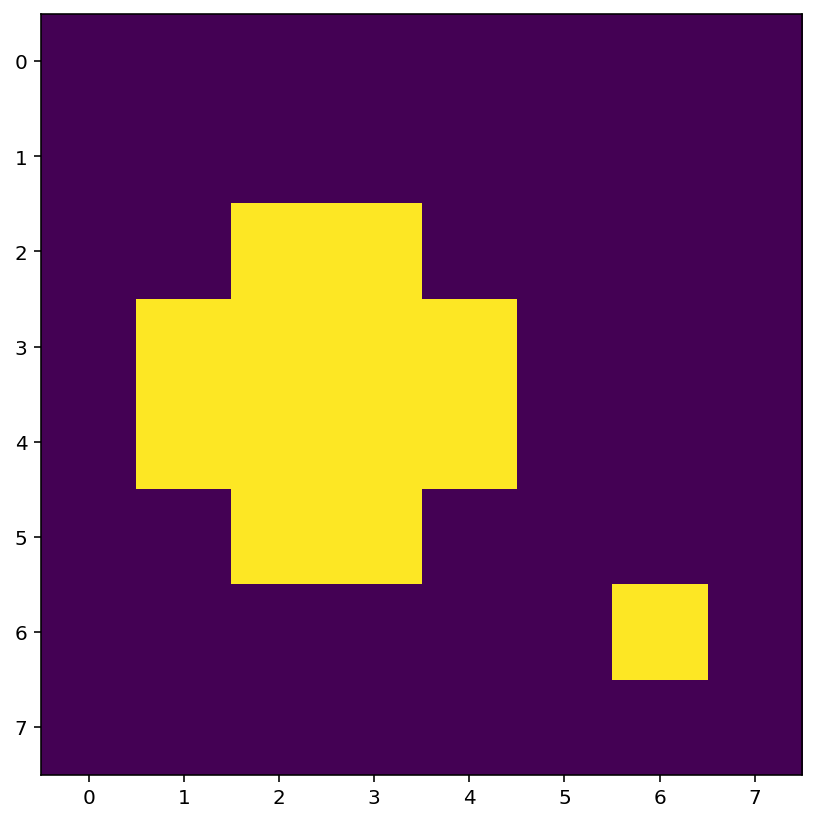

In [4]:
x_threshold = (x > 0.7).astype(int)
print(x_threshold)
plt.imshow(x_threshold)

## Segmentation

The next step is to identify the blobs and determine their size and locations. There is a package called `scipy.ndimage` which contains functions to do exactly this. The following code identifies and prints the number of blobs, their sizes and the co-ordinates of the largest one: 

In [5]:
import scipy.ndimage as sn # import the scipy.ndimage package
x_labels, n = sn.label(x_threshold) # generate 
print("number of blobs:", n)

sizes = sn.sum(x_threshold, x_labels, range(1, n+1))
print("sizes:", sizes)

idx = np.argmax(sizes) # get the index of the largest blob
print("index:", idx)

location = sn.center_of_mass(x_threshold, x_labels, idx + 1) # determine the coordinates of the largest blob
y_pos, x_pos = location
print("co-ordinates:", x_pos, y_pos)

number of blobs: 2
sizes: [12.  1.]
index: 0
co-ordinates: 2.5 3.5


We have identified that the largest blob as co-ordinates (2.5, 3.5). Using `plt.scatter` we can mark this location on the image:

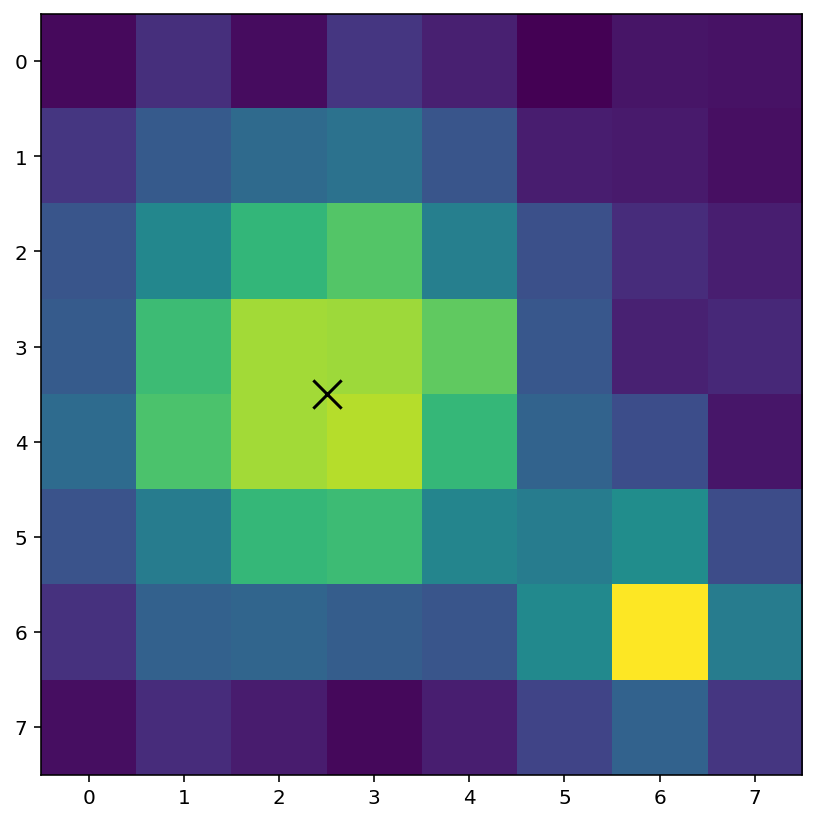

In [6]:
plt.imshow(x) # swho the original image
plt.scatter(x_pos, y_pos, color="black", marker="x", s=200)

The image `frame0.png` is part of one frame of the Brownian motion video.

> Determine the x- and y-coordinates of the particle in the image `frame0.png`.
> 1. Read the image into an array
> 1. Threshold the image using a suitable threshold value
> 1. Segment the image and determine the location of the largest blob
> 1. Mark the location of the particle on the image

## Videos

Our goal is to track the location of a moving particle across a sequence of frames of a video. A video is essentially a sequence of frame-by-frame still images, so we can reuse the techniques above.

The following code loads a video file into an array called `data` and prints out the number of frames:

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('atomic.avi')

frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.zeros((frameCount, frameHeight, frameWidth, 3), np.dtype('int16'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

print("Number of frames:", buf.shape[0])

data = np.mean(buf[:,:,:,:], axis=-1)

Number of frames: 200


We can then extract the first frame (frame number 0) into an array `x`:

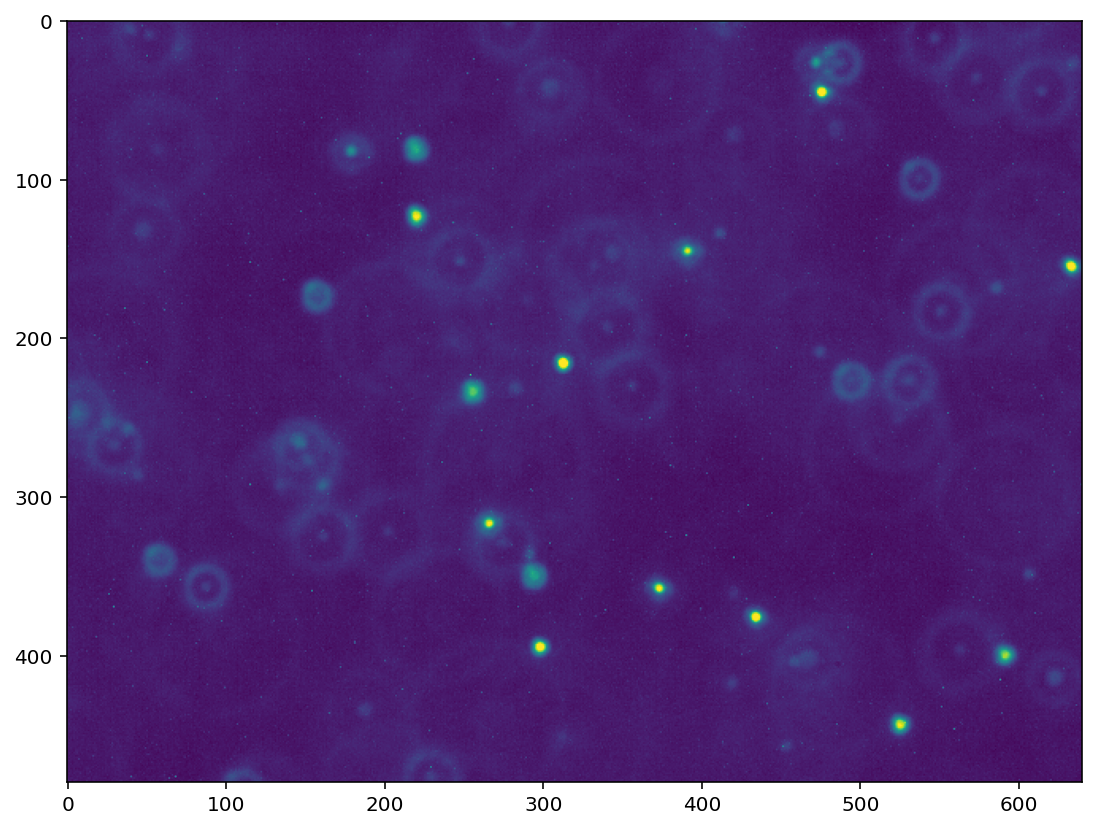

In [8]:
x = data[0,:,:] # extract the first frame

plt.imshow(x)

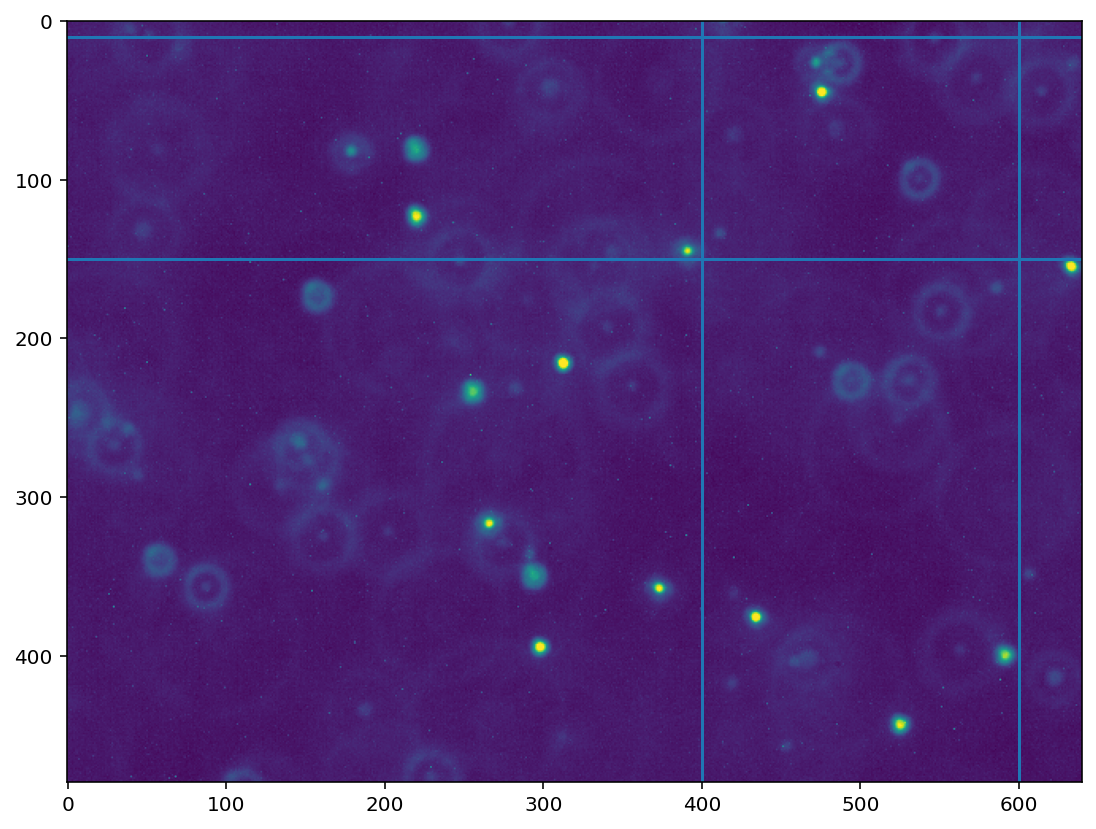

In [9]:
x_min = 400
x_max = 600
y_min = 10
y_max = 150

plt.imshow(x)
plt.axvline(x_min)
plt.axvline(x_max)
plt.axhline(y_min)
plt.axhline(y_max)


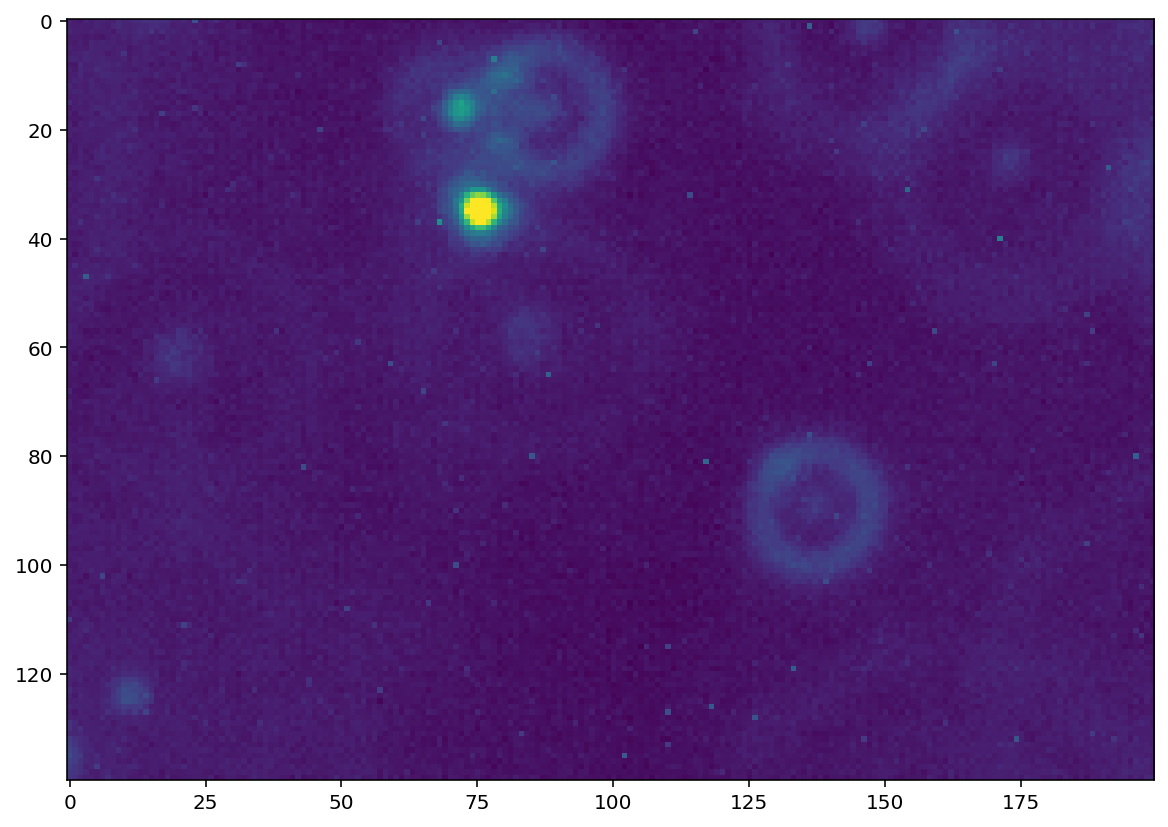

In [10]:
x = data[0, y_min:y_max, x_min:x_max]
plt.imshow(x)

> Use segmentation to determine the x,y-co-ordinates of the particle in the cropped frame. Repeat for a few other frames in the range 0...10. Can you find a threshold value that works across all frames in this range?

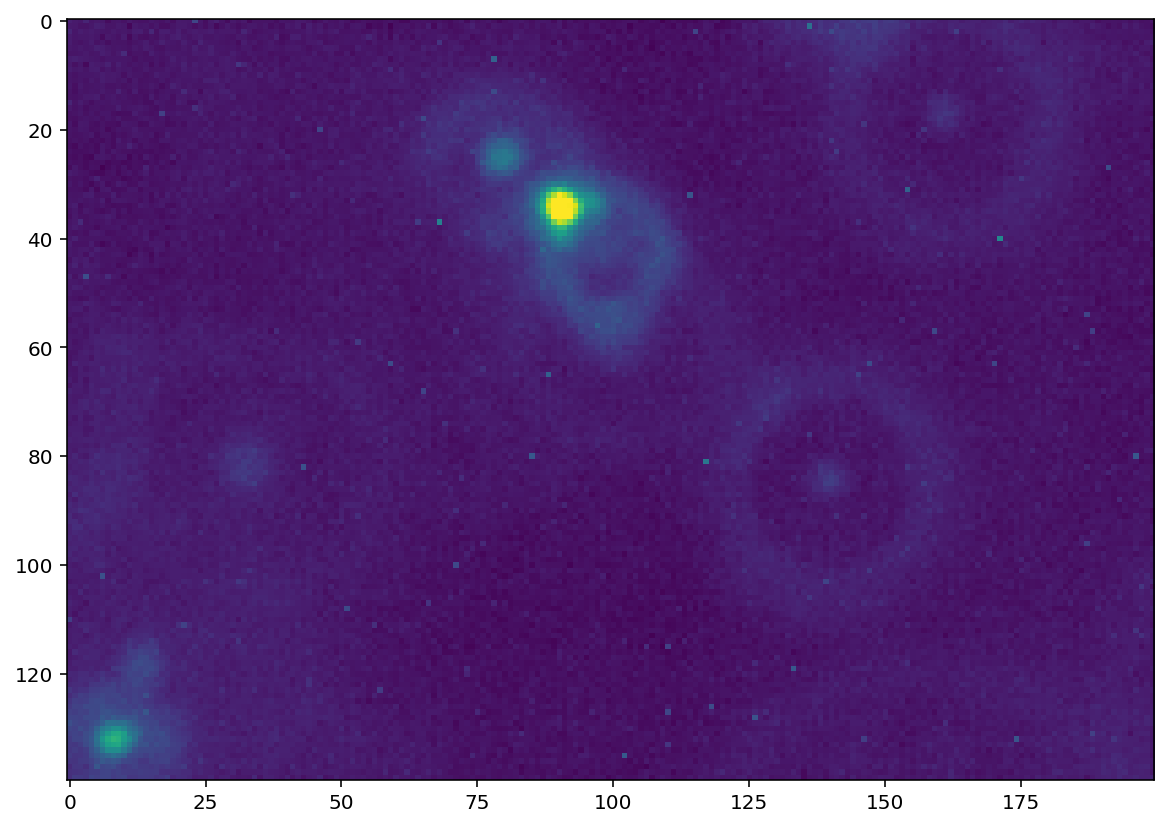

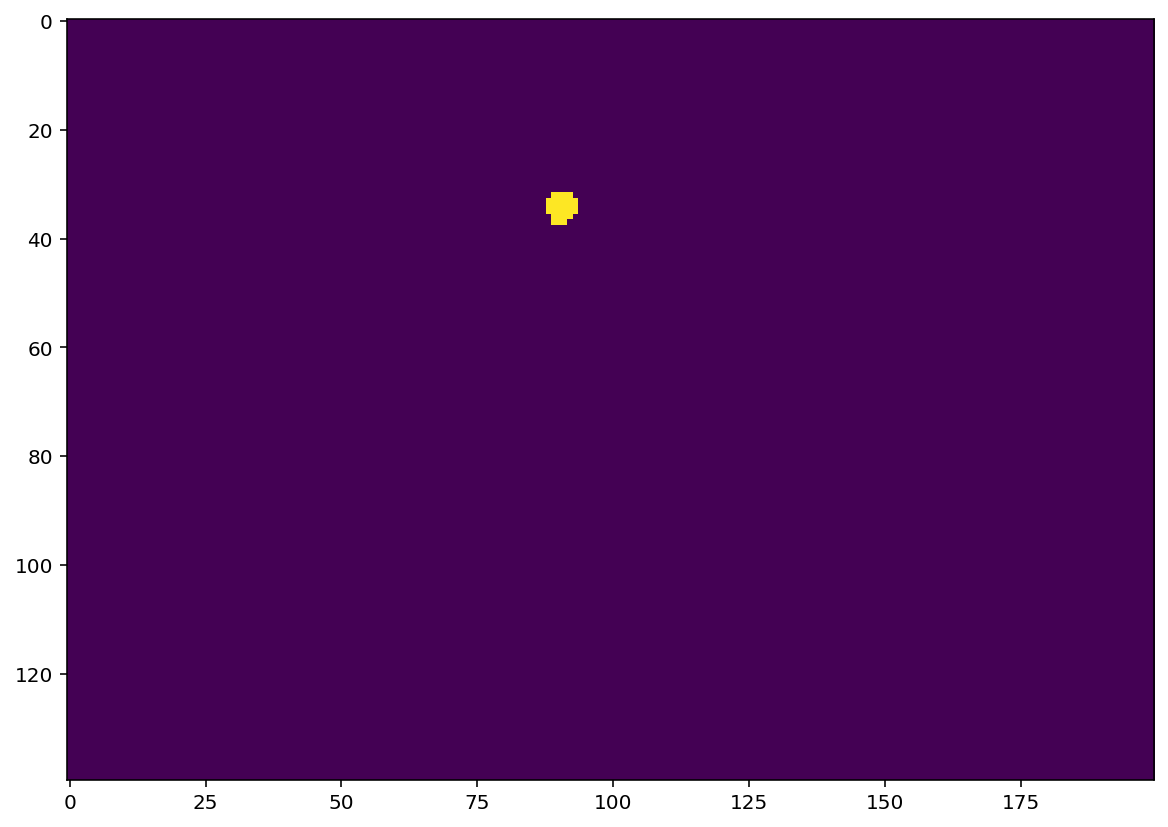

In [11]:
x = data[10, y_min:y_max, x_min:x_max]
plt.figure()
plt.imshow(x)

x_threshold = (x > 200).astype(int)
plt.figure()
plt.imshow(x_threshold)

number of blobs: 1
sizes: [29.]
index: 0
co-ordinates: 75.41379310344827 34.724137931034484
number of blobs: 1
sizes: [32.]
index: 0
co-ordinates: 77.5 39.5
number of blobs: 1
sizes: [31.]
index: 0
co-ordinates: 80.7741935483871 35.516129032258064
number of blobs: 1
sizes: [33.]
index: 0
co-ordinates: 74.42424242424242 38.42424242424242
number of blobs: 1
sizes: [38.]
index: 0
co-ordinates: 74.10526315789474 39.21052631578947
number of blobs: 1
sizes: [37.]
index: 0
co-ordinates: 74.64864864864865 41.054054054054056
number of blobs: 1
sizes: [34.]
index: 0
co-ordinates: 77.5 37.705882352941174
number of blobs: 2
sizes: [36.  2.]
index: 0
co-ordinates: 79.52777777777777 36.138888888888886
number of blobs: 1
sizes: [35.]
index: 0
co-ordinates: 81.57142857142857 34.77142857142857
number of blobs: 2
sizes: [39.  1.]
index: 0
co-ordinates: 88.3076923076923 32.82051282051282
number of blobs: 1
sizes: [29.]
index: 0
co-ordinates: 90.44827586206897 34.310344827586206
number of blobs: 2
sizes: 

(0.0, 140.0)

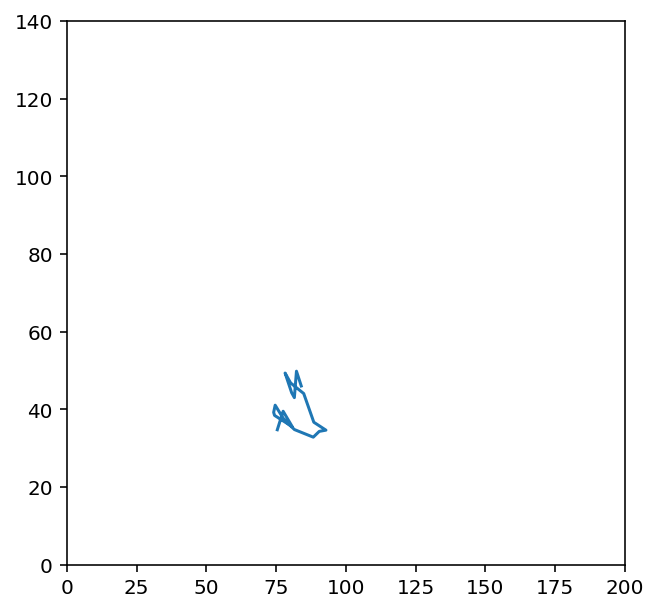

In [12]:

num_frames = 20
x_pos_array = np.zeros(num_frames)
y_pos_array = np.zeros(num_frames)
for i in range(num_frames):
    x = data[i, y_min:y_max, x_min:x_max]
    x_threshold = (x > 200).astype(int)
    import scipy.ndimage as sn # import the scipy.ndimage package
    x_labels, n = sn.label(x_threshold) # generate 
    print("number of blobs:", n)

    sizes = sn.sum(x_threshold, x_labels, range(1, n+1))
    print("sizes:", sizes)

    idx = np.argmax(sizes) # get the index of the largest blob
    print("index:", idx)

    location = sn.center_of_mass(x_threshold, x_labels, idx + 1) # determine the coordinates of the largest blob
    y_pos, x_pos = location
    print("co-ordinates:", x_pos, y_pos)
    
    x_pos_array[i] = x_pos
    y_pos_array[i] = y_pos
    
    
plt.figure(figsize=(5,5))
plt.plot(x_pos_array, y_pos_array)
plt.xlim(0, x_max-x_min)
plt.ylim(0, y_max-y_min)
